# Import Required Packages for EDA

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Read the dataset/s

In [4]:
penguin_df=pd.read_csv('/penguins_size.csv')
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Checking description(first 5 and last 5 rows)

In [9]:
penguin_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [16]:
penguin_df.shape

(344, 7)

# Describing the data

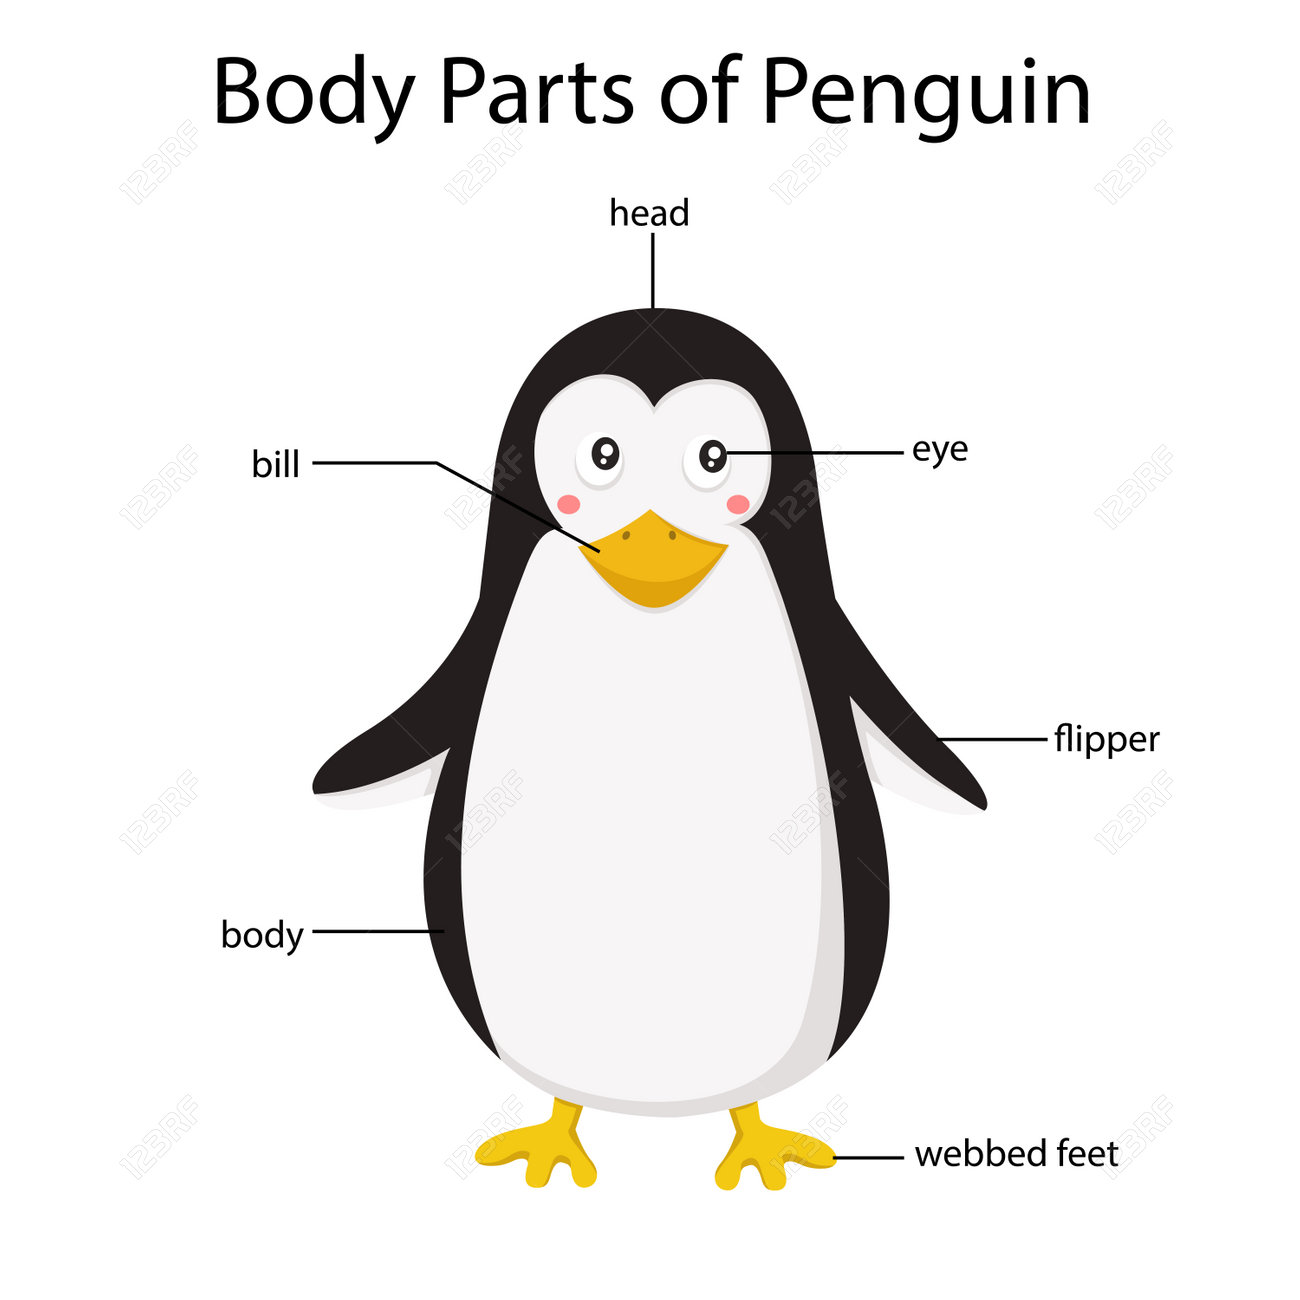

**Columns in the dataset**

**Species:** penguin species (Chinstrap, Adélie, or Gentoo)

**Island:** island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

**culmen_length_mm:** culmen length (mm)

**culmen_depth_mm:** culmen depth (mm)

**flipper_length_mm:** flipper length (mm)

**body_mass_g:** body mass (g)

**Sex:** penguin sex

**What is culmen?**

The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers depending on the standard chosen.

Name of the attributes

In [14]:
penguin_df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Unique values for each attribute

In [15]:
penguin_df.nunique()

,0
species,3
island,3
culmen_length_mm,164
culmen_depth_mm,80
flipper_length_mm,55
body_mass_g,94
sex,3


In [17]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Visualising data  distribution in detail

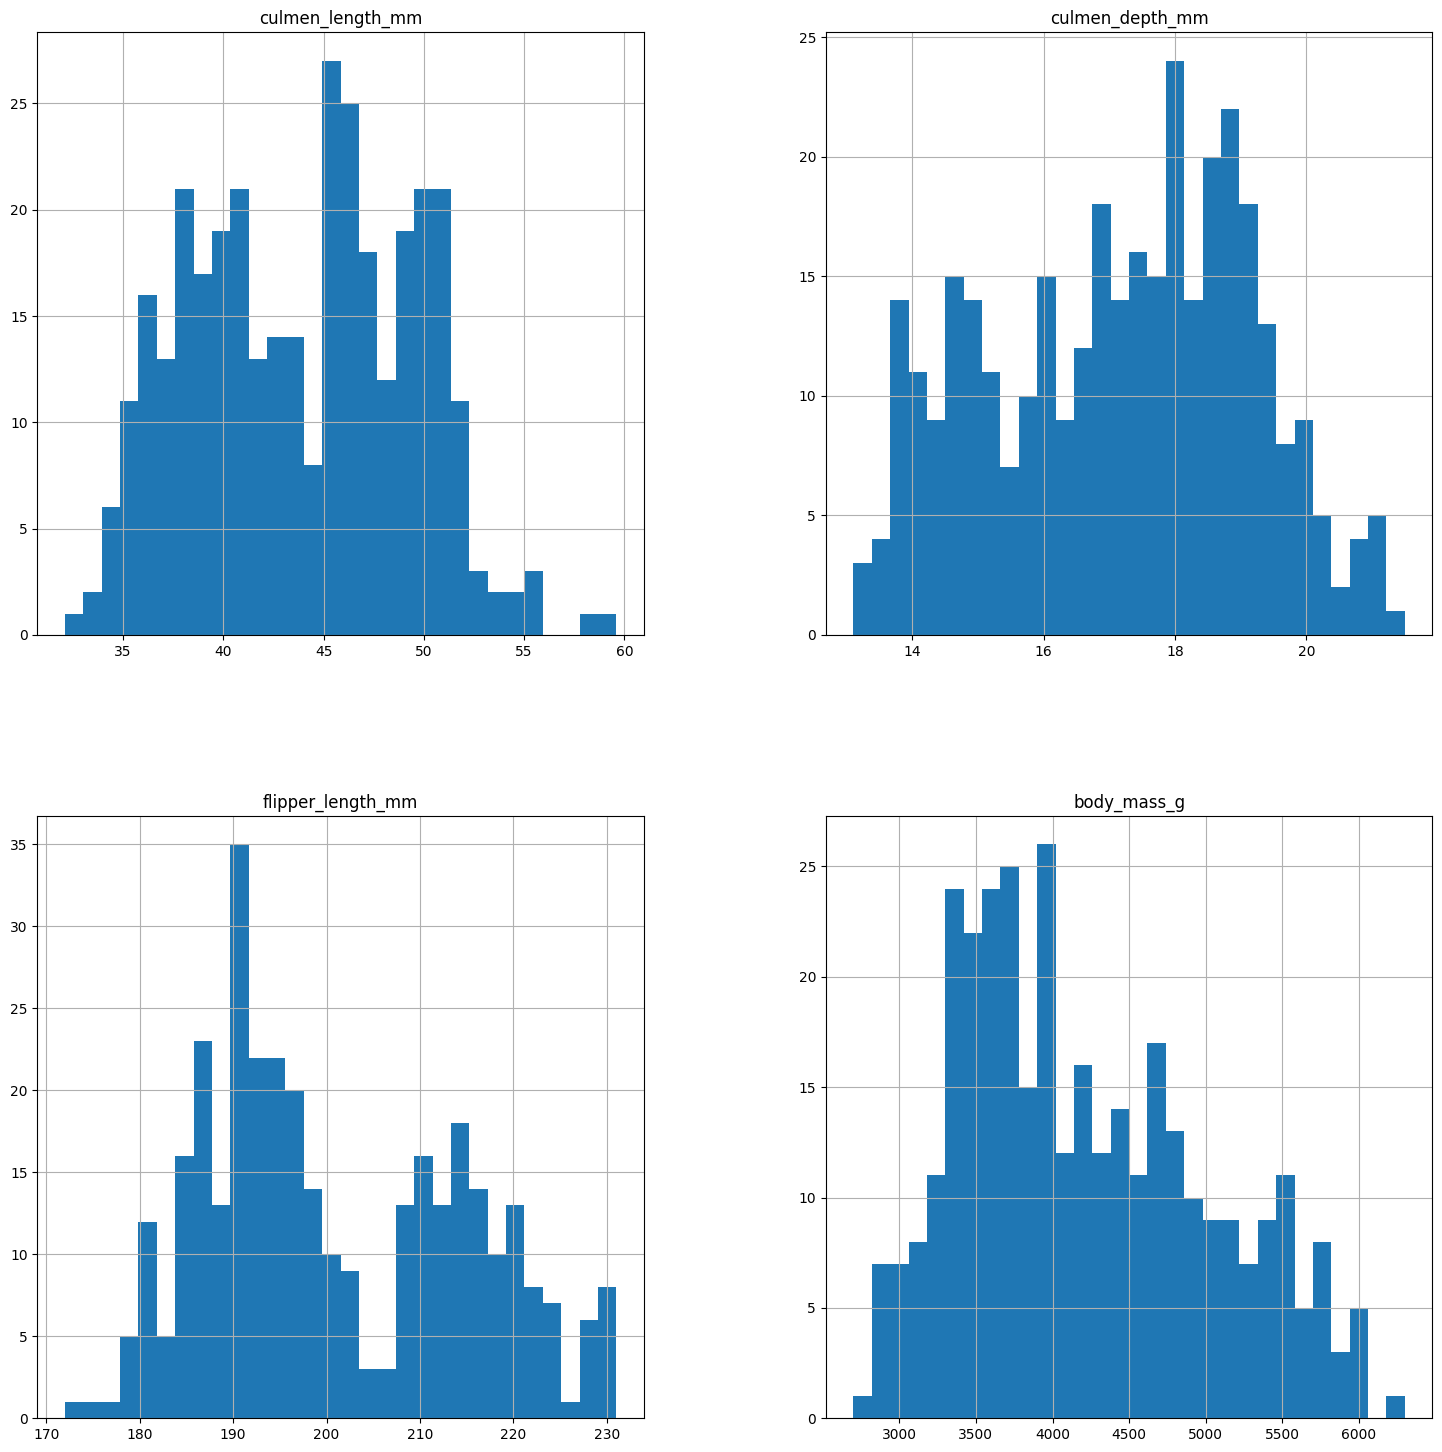

In [21]:
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
penguin_df.hist(ax=ax,bins =30)
plt.show()

checking target value distribution

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


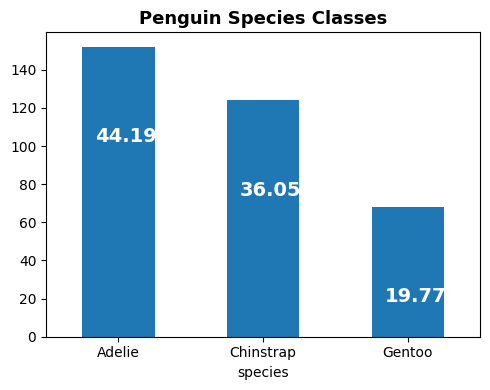

In [23]:
print(penguin_df.species.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Adelie", "Chinstrap", "Gentoo"]
ax = penguin_df.species.value_counts().plot(kind='bar')
ax.set_title("Penguin Species Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')

plt.tight_layout()

In [24]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 34.5 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 70.4 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356222 sha256=e3fc42af59f9beccd9099c7f59f1d1793c220fed1e1ef69c83c7b1b0efa57daf
  Stored in directory: /tmp/pip-ephem-wheel-cache-i_0_ptp3/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=abd35d66373ff0bdf4b1b6050d309ce681ffab45b2e14becd6789085b7bcb1f8
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

In [26]:
#obtain full profiler report
#restart kernel
#re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(penguin_df,title="Penguin Species EDA",
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

for col in penguin_df:
  if penguin_df[col].dtype =='object':
    penguin_df[col]=OrdinalEncoder().fit_transform(penguin_df[col].values.reshape(-1,1))
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.1,18.7,181.0,3750.0,2.0
1,0.0,2.0,39.5,17.4,186.0,3800.0,1.0
2,0.0,2.0,40.3,18.0,195.0,3250.0,1.0
3,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,0.0,2.0,36.7,19.3,193.0,3450.0,1.0
...,...,...,...,...,...,...,...
339,2.0,0.0,NaN,NaN,NaN,NaN,NaN
340,2.0,0.0,46.8,14.3,215.0,4850.0,1.0
341,2.0,0.0,50.4,15.7,222.0,5750.0,2.0
342,2.0,0.0,45.2,14.8,212.0,5200.0,1.0


In [29]:
class_label =penguin_df['species']
penguin_df = penguin_df.drop(['species'], axis =1)
penguin_df = (penguin_df-penguin_df.min())/(penguin_df.max()-penguin_df.min())
penguin_df['species']=class_label
penguin_df

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0,0.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5,0.0
3,1.0,NaN,NaN,NaN,NaN,NaN,0.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5,0.0
...,...,...,...,...,...,...,...
339,0.0,NaN,NaN,NaN,NaN,NaN,2.0
340,0.0,0.534545,0.142857,0.728814,0.597222,0.5,2.0
341,0.0,0.665455,0.309524,0.847458,0.847222,1.0,2.0
342,0.0,0.476364,0.202381,0.677966,0.694444,0.5,2.0


In [32]:
# Pre-processing
penguin_data = penguin_df.copy()
le = preprocessing.LabelEncoder()

# Encoding the categorical and numerical columns
island = le.fit_transform(list(penguin_data["island"]))
gender = le.fit_transform(list(penguin_data["sex"]))
culmen_length = le.fit_transform(list(penguin_data["culmen_length_mm"]))
culmen_depth = le.fit_transform(list(penguin_data["culmen_depth_mm"]))
flipper_length = le.fit_transform(list(penguin_data["flipper_length_mm"]))
body_mass = le.fit_transform(list(penguin_data["body_mass_g"]))
# Note: Remove or update 'year' as the dataset provided doesn't include a 'year' column
#year = le.fit_transform(list(penguin_data["year"]))
species = le.fit_transform(list(penguin_data["species"]))


# Predictive analytics model development by comparing different Scikit-learn classification algorithms

In [33]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [36]:
# Pre-processing
penguin_data = penguin_df.copy()
le = preprocessing.LabelEncoder()

# Encoding the categorical and numerical columns
island = le.fit_transform(list(penguin_data["island"]))
gender = le.fit_transform(list(penguin_data["sex"]))
culmen_length = le.fit_transform(list(penguin_data["culmen_length_mm"]))
culmen_depth = le.fit_transform(list(penguin_data["culmen_depth_mm"]))
flipper_length = le.fit_transform(list(penguin_data["flipper_length_mm"]))
body_mass = le.fit_transform(list(penguin_data["body_mass_g"]))
ps = le.fit_transform(list(penguin_data["species"]))

# Create features (X) and labels (y)
x = list(zip(island, gender, culmen_length, culmen_depth, flipper_length, body_mass))
y = list(ps)

# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.20, random_state=seed)

# Output the size of the training and testing subsets
np.shape(x_train), np.shape(x_test)


((275, 6), (69, 6))

In [37]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)


Performance on Training set
NB: 0.920000 (0.008907)

SVM: 0.989091 (0.008907)

GBM: 0.981818 (0.016262)

RF: 0.985455 (0.013606)



# Compare Algorithms' Performance

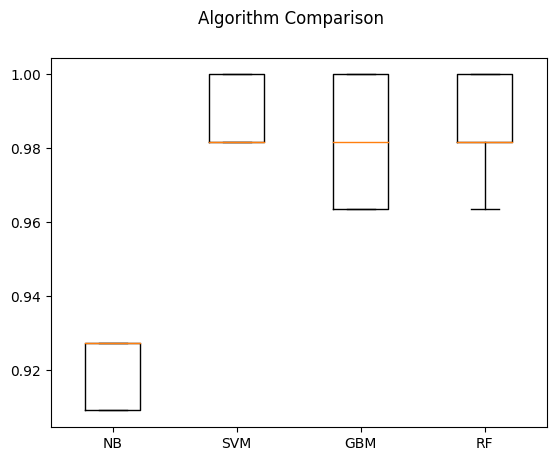

In [38]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Model Evaluation by testing with independent/external test data set.

In [39]:
 # Make predictions on validation/test dataset

svm = SVC()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()

best_model = svm

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))

Best Model Accuracy Score on Test Set: 0.9565217391304348


#Model Performance Evaluation Metric 1 - Classification Report

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.92      0.92      0.92        12
           2       0.96      1.00      0.98        27

    accuracy                           0.96        69
   macro avg       0.95      0.95      0.95        69
weighted avg       0.96      0.96      0.96        69



#Model Performance Evaluation Metric 2

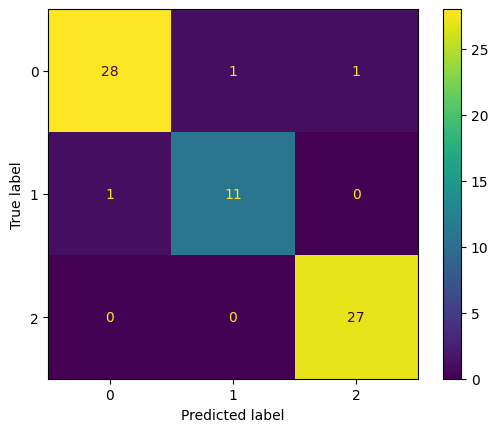

In [41]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Model Evaluation Metric 4-prediction report

In [42]:
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)

Predicted:  1 Actual:  1 Data:  (1, 2, 118, 44, 16, 17)
Predicted:  0 Actual:  0 Data:  (1, 1, 45, 36, 3, 12)
Predicted:  0 Actual:  0 Data:  (0, 2, 72, 52, 21, 42)
Predicted:  2 Actual:  2 Data:  (0, 2, 136, 26, 46, 87)
Predicted:  0 Actual:  0 Data:  (1, 2, 53, 41, 12, 20)
Predicted:  1 Actual:  0 Data:  (2, 2, 95, 58, 22, 44)
Predicted:  2 Actual:  2 Data:  (0, 0, 85, 26, 41, 67)
Predicted:  2 Actual:  2 Data:  (0, 1, 77, 9, 32, 56)
Predicted:  1 Actual:  1 Data:  (1, 1, 89, 35, 16, 12)
Predicted:  0 Actual:  0 Data:  (0, 1, 32, 55, 0, 9)
Predicted:  0 Actual:  0 Data:  (1, 2, 18, 64, 15, 33)
Predicted:  1 Actual:  1 Data:  (1, 2, 151, 57, 22, 19)
Predicted:  0 Actual:  0 Data:  (1, 1, 23, 54, 18, 21)
Predicted:  1 Actual:  1 Data:  (1, 1, 99, 44, 12, 27)
Predicted:  0 Actual:  0 Data:  (2, 2, 53, 59, 24, 40)
Predicted:  2 Actual:  2 Data:  (0, 1, 116, 12, 34, 57)
Predicted:  2 Actual:  2 Data:  (0, 2, 120, 26, 32, 79)
Predicted:  0 Actual:  0 Data:  (2, 2, 83, 49, 34, 40)
Predicted